# Capstone Project : Classification using Support Vector Machine

**Support Vector Machines** are one of the best machine learning methods when getting the correct answer is a higher priorty than understanding why you get the correct answer, and they work really well with relatively small datasets.

*You need to build a **Support Vector Machine** for **classification** using **scikit-learn** and the **Radial Basis Function (RBF) Kernel**, to predict whether or not a patient has heart disease.*

# Task A : Import the relevant packages

Write your Code :-



In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.colors as colors

# splitting  data into training and testing sets
from sklearn.model_selection import train_test_split

 # Scaling and centering data
from sklearn.preprocessing import scale

# Making a support vector machine for classificaiton
from sklearn.svm import SVC 

# For cross validation
from sklearn.model_selection import GridSearchCV

# For Createing a confusion matrix
from sklearn.metrics import confusion_matrix 

# For Performing PCA to plot the data
from sklearn.decomposition import PCA


# Task B : Understand your data


In [3]:
df = pd.read_csv(r'C:\Users\durga\OneDrive\Documents\Python Scripts\processed.cleveland.data',header =None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


**Replace the column numbers with the following column names:**
- **age**,
- **sex**,
- **cp**, chest pain
- **restbp**, resting blood pressure (in mm Hg)
- **chol**, serum cholesterol in mg/dl
- **fbs**, fasting blood sugar
- **restecg**, resting electrocardiographic results
- **thalach**,  maximum heart rate achieved
- **exang**, exercise induced angina
- **oldpeak**, ST depression induced by exercise relative to rest
- **slope**, the slope of the peak exercise ST segment.
- **ca**, number of major vessels (0-3) colored by fluoroscopy
- **thal**, this is short of thalium heart scan.
- **hd**, diagnosis of heart disease, the predicted attribute

Write your Code :-

In [4]:
df.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0



# Task C : Identify Missing Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


*Investigate the columns, **ca** and **thal***

Write your Code :-

In [6]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)


I see that **ca** contains numbers (0.0, 3.0, 2.0 and 1.0) and questions marks (?). The numbers represent the number of blood vessels that we lit up by fluoroscopy and the question marks represent missing data.

In [7]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

**2Q. What do you infer ?**

**Type your Answer :-** Again, **thal** also contains a mixture of numbers, representing the different diagnoses from the thalium heart scan, and question marks, which represent missing values.

# Task D : Deal With Missing Data

**3Q. Do scikit-learn's support vector machines support datasets with missing values ?**

**Type your Answer :-** No. Scikit-learn's support vector machines do not support datasets with missing values. So I can either delete these patients from the training dataset, or impute values for the missing data.

**Look at the missing Values**

Write your Code :-

In [8]:
df.loc[(df['ca']=='?')|(df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


**4Q. What do you infer ?**

**Type your Answer :-** So 6 of the **303** rows, or **2%**, contain missing values. Since **303 - 6 = 297**, and **297** is plenty of data to build a support vector machine, I will remove the rows with missing values, rather than try to impute their values.

**Remove Missing Values**

Write your Code :-

In [9]:
df_no_missing = df.loc[(df['ca'] !='?') & (df['thal'] !='?')]
len(df_no_missing)

297

**Now verify whether the missing values removed or not ?**

Write your Code :-

In [10]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [11]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

# Task E : Format Data for Support Vector Machines

**5Q. What do you mean by formatting data for SVM ?**

**Type your Answer :-** It means Splitting the Data into Dependent and Independent Variables. Which means Splitting the data into the columns of data that we will use to make classifications and into the column of data that we want to predict

**Now copy the data by value, such that original data is never modified further**

Write your Code :-

In [12]:
X = df_no_missing.drop('hd',axis=1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [13]:
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

**6Q. Explain your Data**

**Type your Answer :-** Splitting the data frame into two pieces, `X`contains the data we will use to make, or predict, classifications, and `y`, contains the known classifications in our training dataset.

# Task F : Format the Data Part  2 (One-Hot Encoding)

**7Q. Why do you think one hot encoding is needed at this point ?**

**Type your Answer :-** Scikit learn's Support Vector Machines natively support continuous data, like resting blood preasure (**restbp**) and maximum heart rate (**thalach**), but they do not natively support categorical data, like chest pain (**cp**), which contains 4 different categories. Thus, in order to use categorical data with scikit learn Support Vector Machines, we have to use a trick that converts a column of categorical data into multiple columns of binary values. This trick is called One-Hot Encoding.

**8Q. Which one hot encoding are you using and why ?**

**Type your Answer :-** I use `get_dummies()`, because it leaves my data in a dataframe and retains the column names, making it much easier to verify that it worked as intended.

**Perform one hot encoding for those categorical variables in need**

Write your Code :-

In [14]:
X_encoded = pd.get_dummies(X, columns = ['cp','restecg','slope','thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


**9Q. What about y ?**

**Type your Answer :-**  `y` doesn't just contain **0**s and **1**s. Instead, it has **5** different levels of heart disease. **0 =** no heart disease and **1-4** are various degrees of heart disease. *Since I am making a support vector machine that does simple classification and only care if someone has heart disease or not, I need to convert all numbers **> 0** to **1**.*

In [15]:
print(y.unique(),'\n')

y_not_zero_idx = y>0
y[y_not_zero_idx] = 1
y.unique()

[0 2 1 3 4] 



array([0, 1], dtype=int64)

# Task G : Format the Data Part 3 (Centering and Scaling)

**10Q. Why do you think Radial Basis Function (RBF) is to be used with your building Support Vector Machine ?**

**Type your Answer :-** I think they allow SVMs to efficiently handle non-linear classification tasks by transforming the input space into a higher-dimensional space where the data may be more easily separable. They map the data into a space where it becomes easier to find a hyperplane that separates different classes.

**Split the data into training and testing datasets and then scale them separately**

Write your Code :-

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

**11Q. Why do you Split the data ?**

**Type your Answer :-** I Split the data into training and testing datasets and then scale them separately to avoid **Data Leakage**. **Data Leakage** occurs when information about the training dataset currupts or influences the testing dataset.

# Task H : Build A Preliminary Support Vector Machine

Write your Code :-

In [17]:
clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

**12Q. How does it perform on the Testing Dataset ?**

Write your Code :-

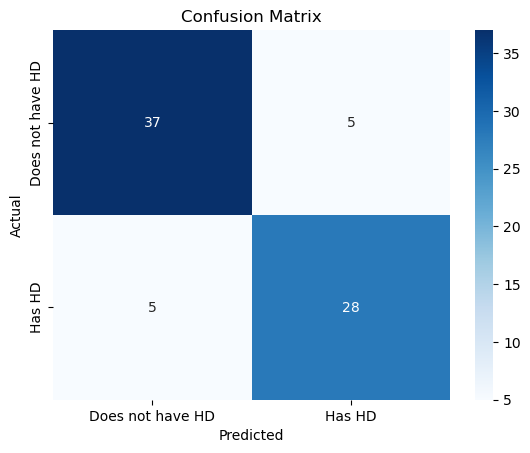

In [18]:
# Computimg confusion matrix
cm = confusion_matrix(y_test, clf_svm.predict(X_test_scaled))

# Plotting confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Does not have HD', 'Has HD'],
            yticklabels=['Does not have HD', 'Has HD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Type your Answer :-** In the confusion matrix, I can say that of the **37 + 5 = 42** people that did not have **Heart Disease**, **37 (88%)** were correctly classified. And of the **5 + 28 = 33** people that have **Heart Disease**, **28 (85%)** were correctly classified. So the support vector machine did pretty well without any optimization.

# Task I : Optimize Parameters with Cross Validation

**12Q. What is optimizing a Support Vector Machine ?**

**Type your Answer :-** I think it is all about improving the accuracy of Support Vector Machine to perform more well on Testing Dataset.

**Optimize your Support Vector Machine**

Write your Code :-

In [19]:
param_grid = [{'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001],
               'kernel': ['rbf']}]

optimal_params = GridSearchCV(SVC(),
                              param_grid,
                              cv=5,
                              verbose=0)

optimal_params.fit(X_train_scaled, y_train)
optimal_params.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

**13Q. What do you infer from your values of optimized hyper parameters ?**

**Type your Answer :-** The dataset is randomly partitioned into **5 equal-sized folds or subsets**, by setting cv equals 5. The model is trained and evaluated 5 times. The combination of hyperparameters that yields the best average performance across the 5 folds is then selected. The grid search found that a value of **C = 10** yielded the best performance on the validation data.  This means the model is giving more importance to minimizing misclassifications on the training data while still considering the margin. The grid search found that a value of **gamma = 0.001** led to the best performance on the validation data. A lower value of gamma implies a broader influence, meaning each data point has a wider range of influence in determining the decision boundary.


# Task J : Build and Interpret the Final Support Vector Machine


**Build your final Support Vector Machine**

Write your Code :-

In [20]:
clf_svm = SVC(random_state = 42, C=10, gamma=0.001)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.001, random_state=42)

**Visualize the performance of optimized support vector machine.**

Write your Code :-

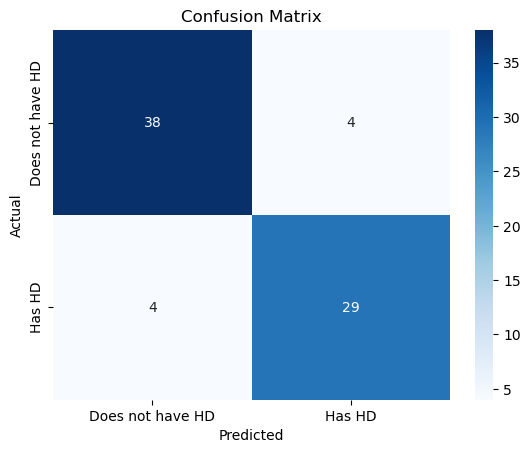

In [21]:
# Computing confusion matrix
cm = confusion_matrix(y_test, clf_svm.predict(X_test_scaled))

# Plotting confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Does not have HD', 'Has HD'],
            yticklabels=['Does not have HD', 'Has HD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**14Q. See if the optimized support vector machine does better than before.**

**Type your Answer :-** I think Yes. The optimized **Support Vector Machine** is better at classifying patients than the preliminary support vector machine. Of the **38 + 4 = 42** people that did not have heart disease, **38 (90%)** were correctly classified. This is an improvement over the preliminary support vector machine, which only correctly classified **37 (88%)** of the patients without heart disease. Of the **4 + 29 = 33** people with heart disease, **29 (87%)** were correctly classified. This is also an improvement over the preliminary support vector machine, which only correctly classified **28 (85%)** of the patients with heart disease.

# Task K : Decision Boundary

**15Q. How do you Draw and Interpret the optimized support vector machine decision boundary ?** 

**Type your Answer :-** I know there are **14** features, or columns, in **X** which would require a 14-dimensional graph, one dimension per feature used to make predictions, to plot the data in its raw form. It is too lengthy to pick two features at random and use as x and y-axes on the graph. Instead I will use **PCA (Principal Component Analysis)** to combine the **14** features into **2** orthogonal meta-features that we can use as axes for a graph.

However, before shrinking the graph, I think it is important to determine how accurate the shrunken graph will be. If it's relatively accurate, than it makes sense to draw the 2-Dimensional graph. If not, the shrunken graph will not be very useful. I use scree plot to determine the accuracy of the graph 

**Code below :-**

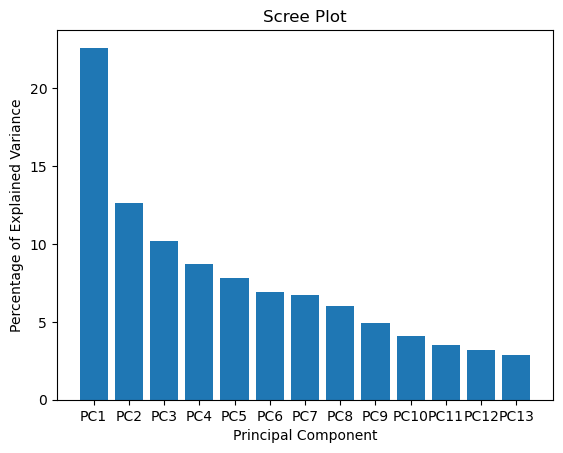

In [22]:
pca = PCA() 
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

**16Q. What do you infer ?**

**Type your Answer :-** The scree plot shows that the first principal component, PC1, accounts for a relatively large amount of variation in the raw data, and this means that it will be a good candidate for the x-axis in the 2-dimensional graph. Since PC2 accounts for the next largest amount of variance, we will use that for the y-axis.

**Draw the PCA graph**

Write your Code :-

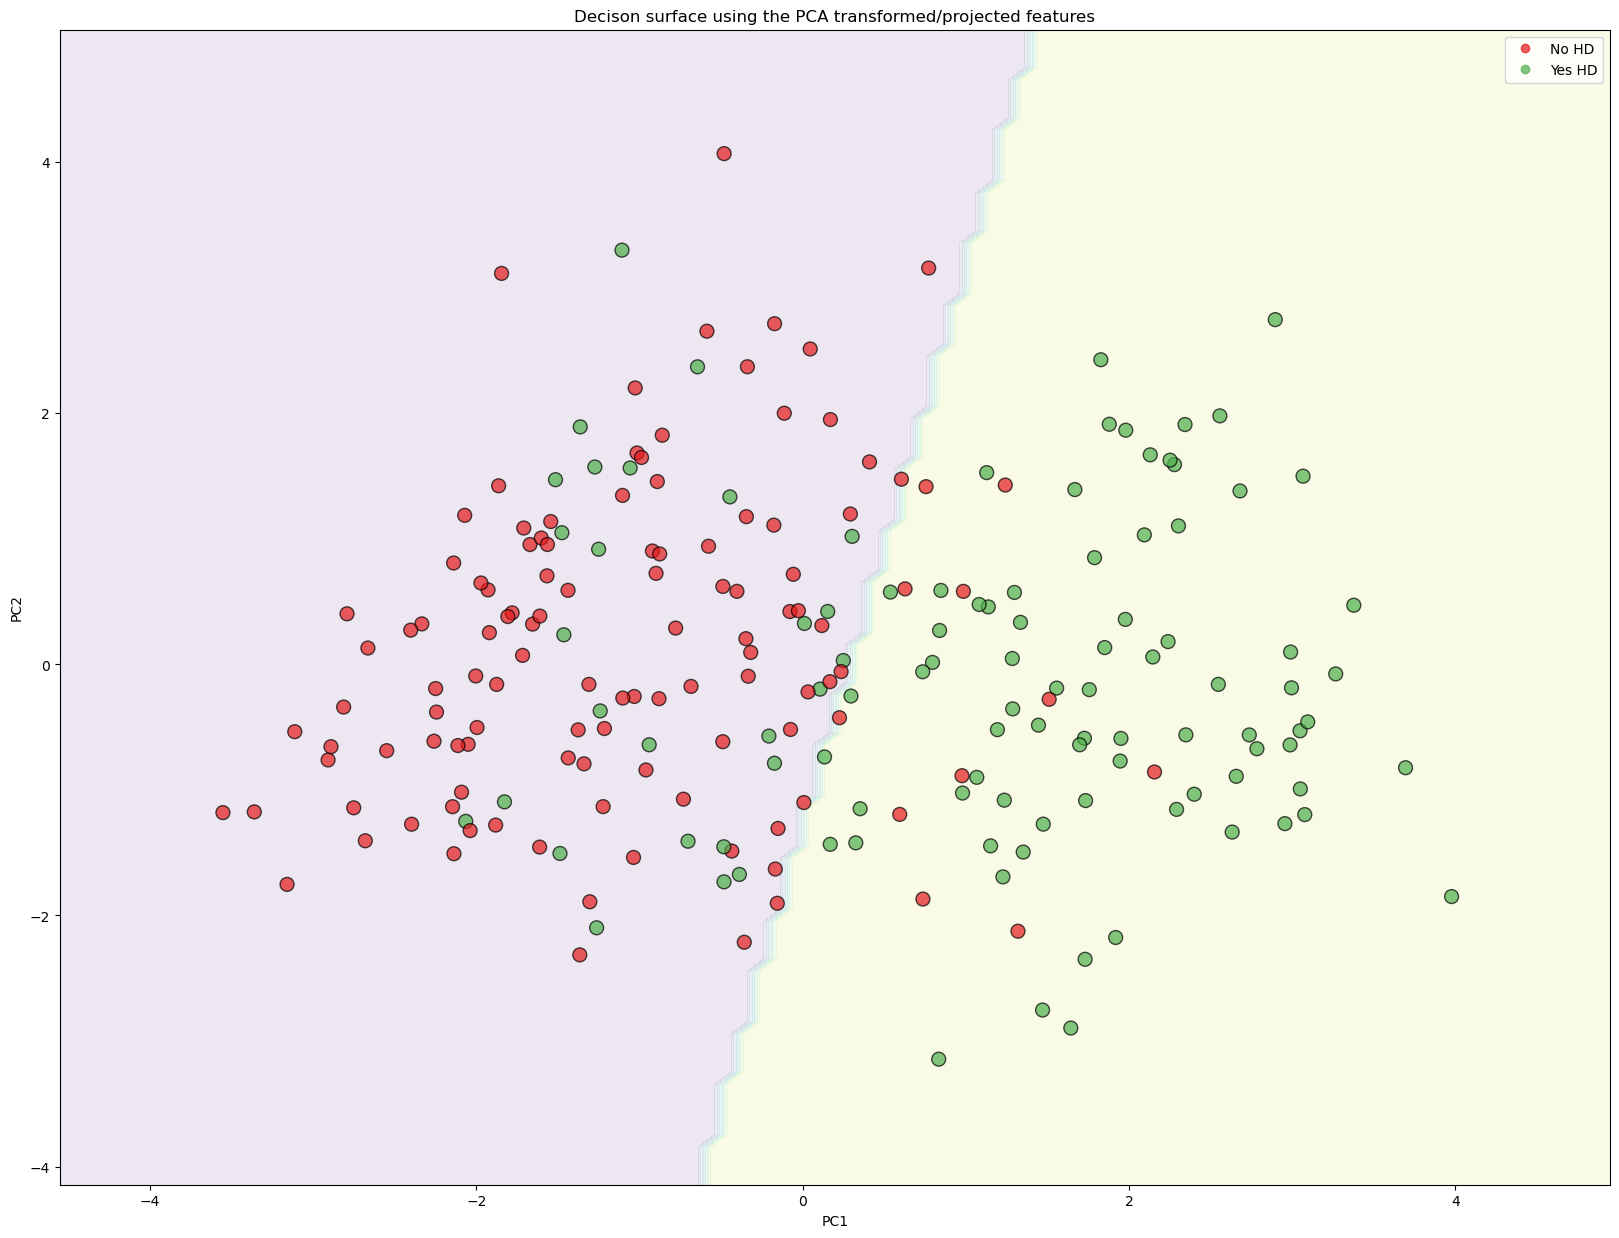

In [23]:
# pc1 contains the x-axis coordinates of the data after PCA
# pc2 contains the y-axis coordinates of the data after PCA
pc1 = X_train_pca[:, 0] 
pc2 = X_train_pca[:, 1]

# Fitting SVM to the x and y-axis coordinates of the data after PCA dimension reduction
clf_svm.fit(np.column_stack((pc1, pc2)), y_train)

# Creating a matrix of points that we can use to show the decision regions.
x_min = pc1.min() - 1
x_max = pc1.max() + 1

y_min = pc2.min() - 1
y_max = pc2.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))


# Classifying every point in that matrix with the SVM.
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)


# Drawing a filled contour plot using the matrix values and classifications. 
fig, ax = plt.subplots(figsize=(20,15))
ax.contourf(xx, yy, Z, alpha=0.1)

# Creating custom colors for the actual data points
cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])
scatter = ax.scatter(pc1, pc2, c=y_train, 
               cmap=cmap, 
               s=100, 
               edgecolors='k', ## 'k' = black
               alpha=0.7)

# Creating a legend
legend = ax.legend(scatter.legend_elements()[0], 
                   scatter.legend_elements()[1],
                    loc="upper right")
legend.get_texts()[0].set_text("No HD")
legend.get_texts()[1].set_text("Yes HD")

## Adding axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decison surface using the PCA transformed/projected features')
plt.show()

**17Q. Explain the PCA graph**

**Type your Answer :-** The pink side of the graph on the left is the area where all datapoints will be predicted to *not have* heart disease. The yellow side of the graph on the right is the area where all datapoints will be predicted to *have* heart disease. The dots are datapoints in the training dataset and are color coded by their known classifications: red is for those that did *not have* heart disease and green is for those that *did* have heart disease.